<a href="https://colab.research.google.com/github/DestonSJU/GenAI/blob/main/HW2/Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

//*** Deston Willis

//*** Generative AI

//*** 9/26/24

//*** Homework 2: The purpose of this assignment is to compare the performance of a MLP and CNN model with image classification

1. First I make neccesary imports and load in the cifar10 dataset. Next I normilized the images by dividing them by 255. I then display some of the training data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets, Sequential
#from notebooks.utils import display

In [2]:
#Number of Parameter
NUM_CLASSES = 10

In [3]:
#Load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [4]:
#X training and testing data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [5]:
display(x_train[:10])
print(y_train[:10])

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]]


2. Next I define the create_mlp_model function which takes in input_shape as a parameter and returns a mlp model. The model I created starts with a Flatten layer. Next I have two dense layers with sizes 200 and 150 respectfully with activation of ReLu. Next I have a dropout layer with a rate of 0.5. Finally, I have the output layer with size 10 with activation softmax since this is a multivariable classification problem. The function then prints a summary of the model and returns it. After this, I compiled the model with Adam optimizer and Sparse Categorical Crossentropy as the loss function. Finally, I used the fit function to train the model for 10 epochs. These were the accuracies and losses for the training and validation: loss: 1.5507 - accuracy: 0.4466 - val_loss: 1.5810 - val_accuracy: 0.4373.

In [6]:
# Function to create MLP model
#Contains one flatten layer, two dense layers, a dropout layer, and an output layer
def create_mlp_model(input_shape):
  model = models.Sequential([
    layers.Flatten(input_shape = input_shape),
    layers.Dense(200, activation="relu"),
    layers.Dense(150, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
  ])
  model.summary()
  return model

In [7]:
#Set up optimizer and compile the MLP model
opt = optimizers.Adam(learning_rate=0.0005)
model = create_mlp_model((32,32,3))
model.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646260 (2.47 MB)
Trainable params: 646260 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#Train the MLP model
trained_model = model.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.9629 - accuracy: 0.2860 - val_loss: 1.7632 - val_accuracy: 0.3769
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7838 - accuracy: 0.3598 - val_loss: 1.6721 - val_accuracy: 0.3963
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7168 - accuracy: 0.3848 - val_loss: 1.6305 - val_accuracy: 0.4161
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6710 - accuracy: 0.4026 - val_loss: 1.6030 - val_accuracy: 0.4396
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6414 - accuracy: 0.4168 - val_loss: 1.5785 - val_accuracy: 0.4353
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6132 - accuracy: 0.4233 - val_loss: 1.5445 - val_accuracy: 0.4502
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5934 - accuracy: 0.4319 - val_loss: 1.5425 - val_accuracy:

3. Next I define the create_cnn_model function which takes in input_shape as a parameter and returns a CNN model. I first make the initial model with the Sequential function. I then add all of the different layers. For Convolution layer 1 I have filter set to 32, kernel size of 3, stride of 1, and same padding. I then added a Batch Normalization and Leaky ReLu layer. Next I add a second Convolution layer with the same parameter except stride of 2 instead of 1. I then add another Batch Normalization and Leaky ReLu layer. For the third Convolution layer it is the same as the first Convolution layer except the filter is 64 since of 32. I then add another Batch Normalization and Leaky ReLu layer. For the 4th Convolution layer I used the same parameters as the third one except I have stride of 2 instead of 1. I follow that up with another Batch Normalization and Leaky ReLu layer. I then add a Flatten layer. Next I have a dense layer with size 128. This is followed by one more Batch Normalization and Leaky ReLu layer. I end off the model with a Dense layer of size 10 since there are 10 parameters and an Softmax Activation layer since this is a multivariable classification problem. After this, I compiled the model with Adam optimizer and Sparse Categorical Crossentropy as the loss function. Finally, I used the fit function to train the model for 10 epochs. These were the accuracies and losses for the training and validation: loss: 0.6428 - accuracy: 0.7763 - val_loss: 0.9724 - val_accuracy: 0.6735.

In [9]:
#Creates function for CNN model
#Contains 4 Convolution layers, each followed by Batch Normalization and Leaky ReLu layers,
#a Flatten layer, a Dense layer followed by another Batch Normalization and Leaky ReLu layer
#and an output layer with softmax activation
def create_cnn_model(input_shape):
  model = Sequential()
  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=1, padding="same", input_shape=input_shape,))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2D(filters=32, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=1, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Conv2D(filters=64, kernel_size=3, strides=2, padding="same"))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())

  model.add(layers.Flatten())

  model.add(layers.Dense(128))
  model.add(layers.BatchNormalization())
  model.add(layers.LeakyReLU())
  model.add(layers.Dropout(rate=0.5))

  model.add(layers.Dense(NUM_CLASSES))
  model.add(layers.Activation("softmax"))

  model.summary()
  return model

In [10]:
#Set up optimizer and compile the CNN model
opt = optimizers.Adam(learning_rate=0.0005)
model2 = create_cnn_model((32,32,3))
model2.compile(
    loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                                
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 32)       

In [11]:
#Train the CNN model
trained_model2 = model2.fit(x_train, y_train, batch_size=32, epochs=10, shuffle=True, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 34s 20ms/step - loss: 1.5653 - accuracy: 0.4495 - val_loss: 1.6127 - val_accuracy: 0.4424
Epoch 2/10
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1457 - accuracy: 0.5948 - val_loss: 1.1802 - val_accuracy: 0.5762
Epoch 3/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.9943 - accuracy: 0.6514 - val_loss: 0.9642 - val_accuracy: 0.6614
Epoch 4/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.9080 - accuracy: 0.6839 - val_loss: 1.3069 - val_accuracy: 0.5854
Epoch 5/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.8503 - accuracy: 0.7047 - val_loss: 0.9446 - val_accuracy: 0.6694
Epoch 6/10
1563/1563 [==============================] - 31s 20ms/step - loss: 0.7953 - accuracy: 0.7244 - val_loss: 0.9133 - val_accuracy: 0.6763
Epoch 7/10
1563/1563 [==============================] - 32s 20ms/step - loss: 0.7538 - accuracy: 0.7369 - val_loss: 0.8790 -

4. and 5. I used the evaluate function in order to test the MLP and CNN models. The MLP model had an accuracy of 0.4373 and a loss of 1.5810, while the CNN model had an accuracy of 0.6735 and a loss of 0.9724. I then plotted the validation accuracies and the testing accuracies against each other.

In [12]:
#Test the MLP model
model.evaluate(x_test, y_test, batch_size=1000)


10/10 [==============================] - 0s 5ms/step - loss: 1.5810 - accuracy: 0.4373


[1.5810329914093018, 0.4372999966144562]

In [13]:
#Test the CNN model
model2.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 84ms/step - loss: 0.9724 - accuracy: 0.6735


[0.9723649621009827, 0.6735000014305115]

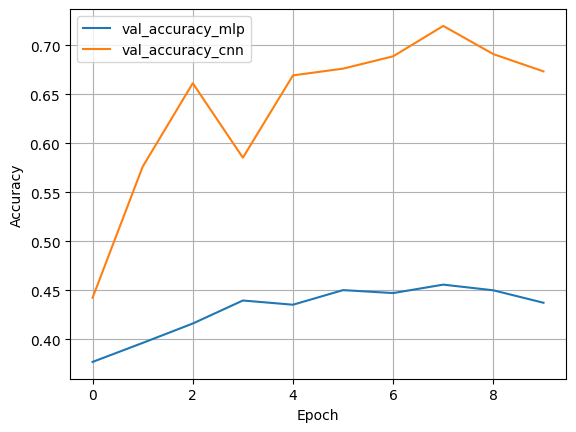

In [15]:
#Plot the validation accuracies
plt.plot(trained_model.history['val_accuracy'], label='val_accuracy_mlp')
plt.plot(trained_model2.history['val_accuracy'], label='val_accuracy_cnn')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

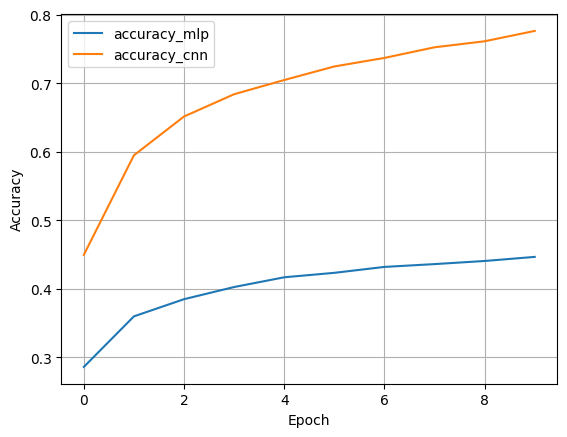

In [16]:
#Plot the test accuracies
plt.plot(trained_model.history['accuracy'], label='accuracy_mlp')
plt.plot(trained_model2.history['accuracy'], label='accuracy_cnn')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

Looking at the testing accuracies between the two models, the CNN model was significantly more accurate than the MLP model. CNN had an accuracy of 0.6735 vs MLP with an accuracy of 0.4373. As well, the CNN had less loss than the MlP model. The CNN had a loss of 0.9724 vs the MLP model with an loss of 1.5810. The reason that CNN models work better for classifying images is that they can take in the spatial elements of the image. The MLP puts the image into one vector, while the CNN can have the image in multiple vectors, which allow more spatial information to be seen. Looking at the training time between the two models. The MLP model was significantly faster, with a training time of about 71 seconds vs CNN with a training time of about 316.8 seconds. As well, the resource usage for the CNN model was higher than the resource usage for the MLP model. One sign of overfitting is that the training accuracy for the CNN model is higher than the test accuracy by about 10 percent. Regularization techniques like dropout help to mitigate this by helping the model to be more generalized. Generalization helps with overfitting since it allows the model to better classify new scenerios rather just memorize the training data.